# Notebook Setup

In this first cell, I'm just using the code provided by teaching staff to access the data on the course's GitHub page.

In [ ]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
import os
sys.path.append(home)      # add home folder to module search path

Already up to date.


# Choosing a dataset
Here I take a look at the different datasets stored on the GitHub, so I can choose something to investigate further.

In [ ]:
!ls ds-assets/assets

 2fold-xval.png		      mammals-missing.csv
 5fold-xval.png		     'messy_covid19_southamerica - covid19_southamerica.csv'
 abalone.csv		      mlp.py
 bootstrap.py		      mlp_regression2.py
 caesarian.csv		      mlp_regression.py
 candy-data.csv		      model-performance-curves.png
 cars.csv		      newsgroups.csv
 classification1.jpg	      newsgroups-noheaders.csv
 classification2.jpg	     'Pancreatic Cancer 2020.csv'
 classification3.jpg	      PandasPythonForDataScience.jpg
 colab-badge.afdesign	      PandasPythonForDataScience.pdf
 colab-icon.afdesign	      pdf-badge.png
 colab-icon.png		      perceptron-eq.jpg
 confint.py		      perceptron.jpg
 confusion1.png		      perceptron.r
 confusion2.png		      perceptron-search.png
 crohnd.csv		      perceptron-train.jpg
 cross-validated-curve.png    pipeline.png
 data-science.jpg	      regression1.jpg
 diamonds.csv		      rs.png
 divorce.csv		      shuttle.csv
 divorce-readme.txt	      shuttle.pdf
 elbow.py		      sobar-72.csv
 gapminder_all.c

In [ ]:
import pandas as pd
diamonds_df = pd.read_csv(home+"diamonds.csv")
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Data in 'Diamonds' File
This first dataset appears to have information about a collection of diamonds and the attributes of each. There's information about how many carats each is, the cut, color, clarity, depth, table, and price, as well as x, y, and z. I'm not sure what the target/dependent variable is in this case; perhaps it's the price being dependent on the other qualitative factors.

In [ ]:
diamonds_df.info()
print("\nThe table contains information about %d diamonds (one per row) and there are %d attributes per diamond (one per column)." % (diamonds_df.shape[0], diamonds_df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB

The table contains information about 53940 diamonds (one per row) and there are 11 attributes per diamond (one per column).


# Types of data
The columns contain both numerical data (depth, table, price) and categorical data (color, cut, clarity). There are 11 columns, and the one unnamed column appears to simply have a numerical identifier for each row, 0-53939, which isn't very useful for our purposes. Some of the other columns contain data which definitely falls within a small range, but it's not exactly the same or unhelpfully unique, like the ID numbers.

In [ ]:
categoricals = ['cut', 'color', 'clarity']
numericals = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for col in categoricals:
    print("The most common %s is %s." % (col, diamonds_df[col].mode()[0]))

The most common cut is Ideal.
The most common color is G.
The most common clarity is SI1.


# General Statistics

In [ ]:
print("AVERAGE VALUES")
for col in numericals:
    print("The mean %s is %f." % (col, diamonds_df[col].mean()))

print("\nMAX VALUES")
for col in numericals:
    print("The maximum %s value is %f." % (col, diamonds_df[col].max()))

print("\nMIN VALUES")
for col in numericals:
    print("The minimum %s value is %f." % (col, diamonds_df[col].min()))

AVERAGE VALUES
The mean carat is 0.797940.
The mean depth is 61.749405.
The mean table is 57.457184.
The mean price is 3932.799722.
The mean x is 5.731157.
The mean y is 5.734526.
The mean z is 3.538734.

MAX VALUES
The maximum carat value is 5.010000.
The maximum depth value is 79.000000.
The maximum table value is 95.000000.
The maximum price value is 18823.000000.
The maximum x value is 10.740000.
The maximum y value is 58.900000.
The maximum z value is 31.800000.

MIN VALUES
The minimum carat value is 0.200000.
The minimum depth value is 43.000000.
The minimum table value is 43.000000.
The minimum price value is 326.000000.
The minimum x value is 0.000000.
The minimum y value is 0.000000.
The minimum z value is 0.000000.


# Carat Data
A quick look at the chart shows that the majority of the diamonds are less than 1 carat each, so lots of relatively small stones. The weights appear to drop exponentially as they increase, with rapid drops between different sizes.

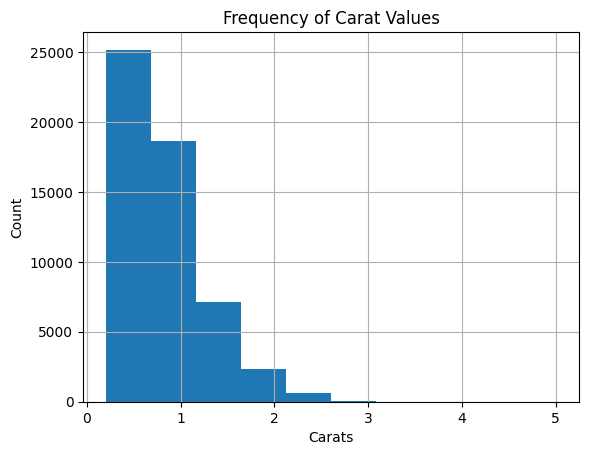

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


diamonds_df['carat'].hist()
plt.xlabel('Carats')
plt.ylabel('Count')
plt.title('Frequency of Carat Values')
plt.show()

# Depth Data
The depth data is interesting, the first histogram I created had most of the values clustered in a very small range, so I tried increasing the number of bins to get a better visual on the breakdown of values. However, even with 20-30 bins, the data remains very clustered around just a few values. This histogram looks like a pretty tightly bunched normal distribution.

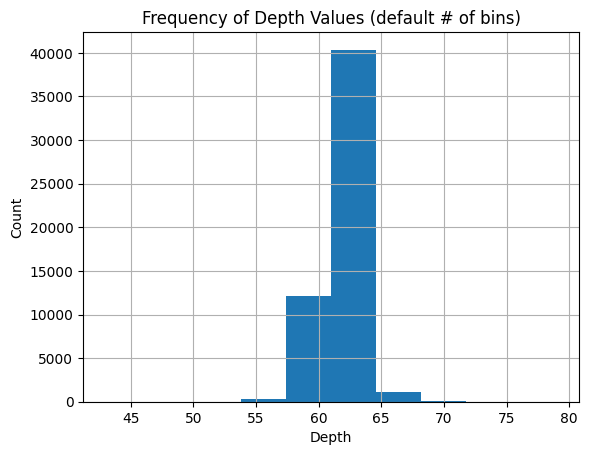

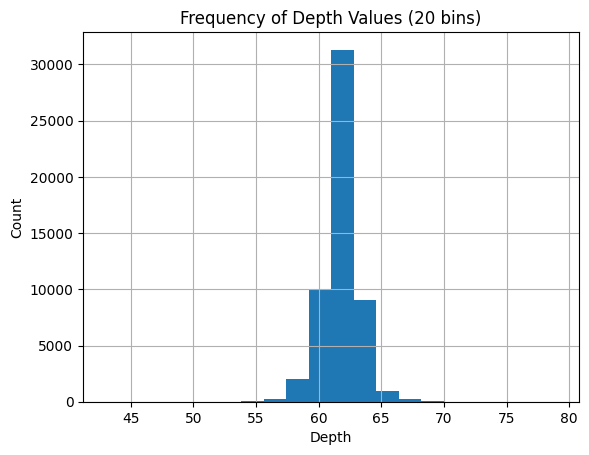

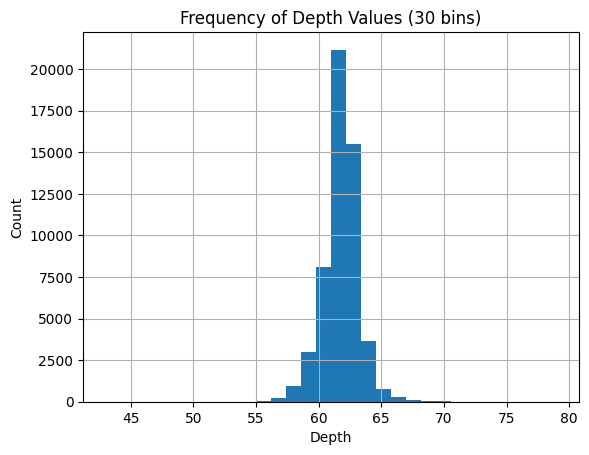

In [ ]:
diamonds_df['depth'].hist()
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title('Frequency of Depth Values (default # of bins)')
plt.show()

diamonds_df['depth'].hist(bins=20)
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title('Frequency of Depth Values (20 bins)')
plt.show()

diamonds_df['depth'].hist(bins=30)
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title('Frequency of Depth Values (30 bins)')
plt.show()

# Table Data
The table data is very tightly clustered just like the depth data. Rather than showing the default (less informative) histogram, for the table data I've just included the one with 30 bins. Still, there's a pretty tight range of values for the vast majority of the data. In this case, the data again looks mostly normal, but there's definitely a skew towards the lower values.

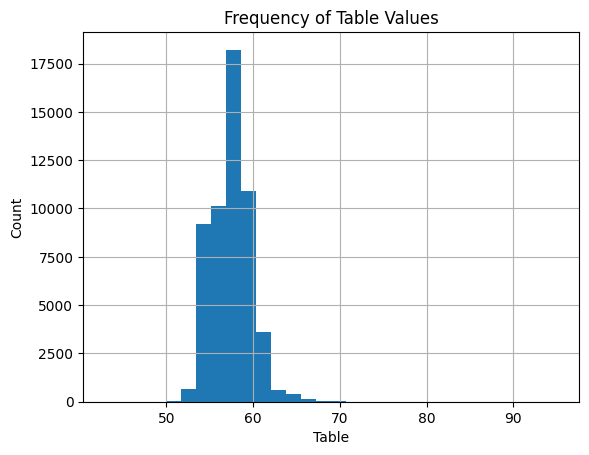

In [ ]:
diamonds_df['table'].hist(bins=30)
plt.xlabel('Table')
plt.ylabel('Count')
plt.title('Frequency of Table Values')
plt.show()

# Price Data
The frequency of prices, like the frequency of carat values, appears to drop exponentially as the value increases. Around half the diamonds are worth < $2500, the next bin is a little less than half as large, and each successive bin drops a bit more beyond that. The drops aren't quite as drastic as the carat data, but it still appears exponential.

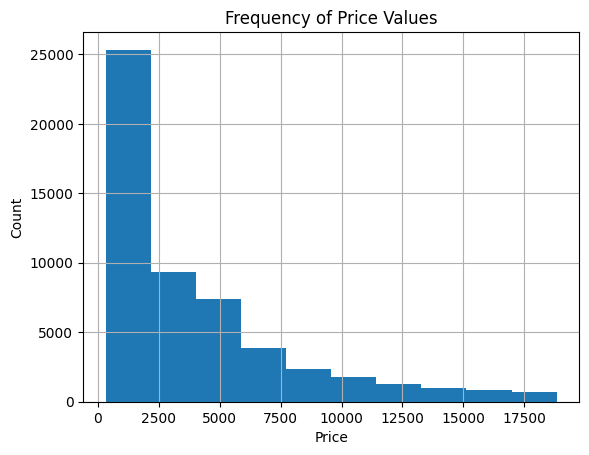

In [ ]:
diamonds_df['price'].hist()
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Frequency of Price Values')
plt.show()

# Cut Quality Data
The diamonds whose data are gathered into this dataset seem to be a good bunch: the category with the most diamonds is the highest rating possible, and there's less diamonds in each tier as you move down in quality. I don't know what you might expect from a 'randomly chosen' diamond, but this looks like a group of high cut quality diamonds.

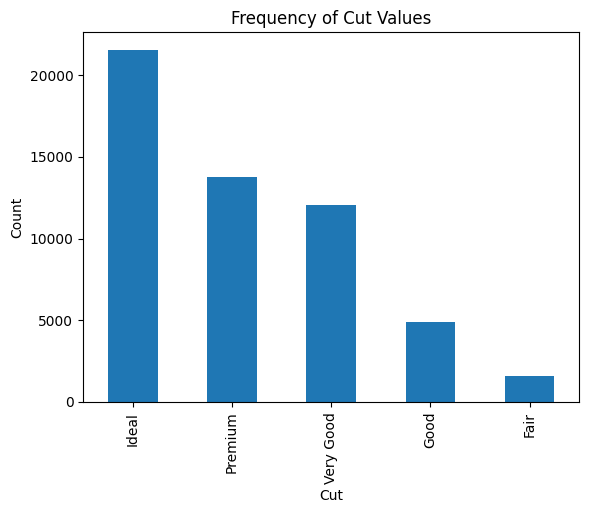

In [ ]:
diamonds_df['cut'].value_counts().plot(kind='bar')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Frequency of Cut Values')
plt.show()

# Color Quality Data
This category is a little less straightforward than the cut data. The closer the letter is to the front of the alphabet, the better the rating, so we can see that:
 - The fourth highest rating in the set (G) is most frequent. A quick google search says that G is a good balance between quality and value.
 - The second and third highest ratings (E and F) follow G. These are probably also better bang for your buck than highest rating, without being visibly displeasing.
 - Next is fifth (H), and then first in quality (D) is fifth in frequency.
 - The two least frequent are also the two lowest ratings.  
  
G is a clear favorite, and then E, F, and H are relatively close, and then D, I, and J are all less frequent in the data.

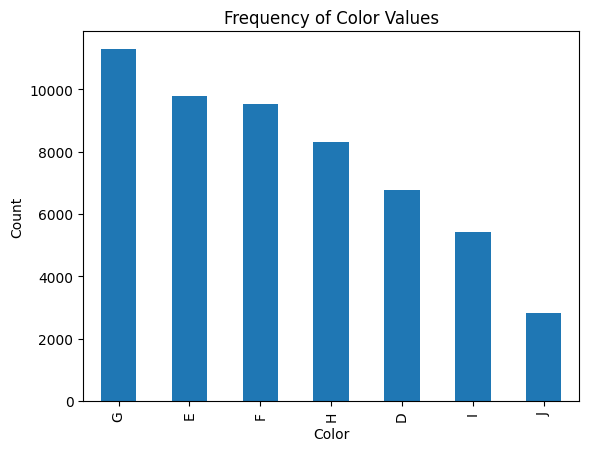

In [ ]:
diamonds_df['color'].value_counts().plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Frequency of Color Values')
plt.show()

# Clarity Data
The clarity data is also not balanced, with significantly more SI1 and VS2 diamonds than any other kind. Trailing those and similar in frequency are SI2 and VS1, so the top four frequencies are all clarities which have inclusions that aren't visible without magnification. Then there are significantly less of VVS2, VVS1, IF, and I1.

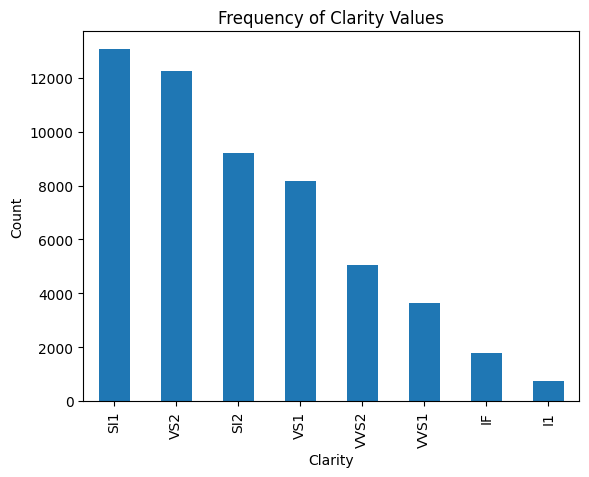

In [ ]:
diamonds_df['clarity'].value_counts().plot(kind='bar')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.title('Frequency of Clarity Values')
plt.show()

# Weather Dataset

In [ ]:
weather_df = pd.read_csv(home+"weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Data in 'Weather History' File

In [ ]:
weather_df.info()
print("\nThe table contains information about %d weather records and there are %d attributes per record (one per column)." % (weather_df.shape[0], weather_df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB

The table contains information about 96453 weather records and there

# Types of Data
This dataset contains both categorical and numerical data. The categorical columns include the summary, precipitation type, and daily summary, while the numerical columns include specific meaurements of temperature (actual and apparent), humidity, wind speed and bearing, visibility, (c)loud cover, and pressure.

In [ ]:
weather_df.rename(columns={'Loud Cover': 'Cloud Cover'}, inplace=True)

In [ ]:
categoricals = ['Summary', 'Precip Type', 'Daily Summary']
numericals = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Cloud Cover', 'Pressure (millibars)']

for col in categoricals:
  print("The most common %s is %s." % (col, weather_df[col].mode()[0]))

The most common Summary is Partly Cloudy.
The most common Precip Type is rain.
The most common Daily Summary is Mostly cloudy throughout the day..


# General Statistics
There's not too much of note in the general statistics, unless you're a weatherman. The one thing that sticks out is the fact that both the maximum and minimum cloud cover are 0, which means we're basically getting no data from this column. Since there was also a typo in the original column name, I'd guess that there's some data collection problem here, but I'm no weatherman, so I won't be trying to fill in values.

In [ ]:
print("AVERAGE VALUES")
for col in numericals:
    print("The mean %s is %f." % (col, weather_df[col].mean()))

print("\nMAX VALUES")
for col in numericals:
    print("The maximum %s value is %f." % (col, weather_df[col].max()))

print("\nMIN VALUES")
for col in numericals:
    print("The minimum %s value is %f." % (col, weather_df[col].min()))

AVERAGE VALUES
The mean Temperature (C) is 11.932678.
The mean Apparent Temperature (C) is 10.855029.
The mean Humidity is 0.734899.
The mean Wind Speed (km/h) is 10.810640.
The mean Wind Bearing (degrees) is 187.509232.
The mean Visibility (km) is 10.347325.
The mean Cloud Cover is 0.000000.
The mean Pressure (millibars) is 1003.235956.

MAX VALUES
The maximum Temperature (C) value is 39.905556.
The maximum Apparent Temperature (C) value is 39.344444.
The maximum Humidity value is 1.000000.
The maximum Wind Speed (km/h) value is 63.852600.
The maximum Wind Bearing (degrees) value is 359.000000.
The maximum Visibility (km) value is 16.100000.
The maximum Cloud Cover value is 0.000000.
The maximum Pressure (millibars) value is 1046.380000.

MIN VALUES
The minimum Temperature (C) value is -21.822222.
The minimum Apparent Temperature (C) value is -27.716667.
The minimum Humidity value is 0.000000.
The minimum Wind Speed (km/h) value is 0.000000.
The minimum Wind Bearing (degrees) value is

# Summary Data
The summary data is a bit more difficult to work with, since there are so many labels and most of them are so rarely used. What really sticks out in the chart is that 'partly cloudy' and 'mostly cloudy' are by far the most common summaries, with 'overcast', 'foggy', and 'breezy and partly cloudy' making up a group that is far less frequent but still notable, as opposed to designations like 'windy and overcast', which is almost never used.

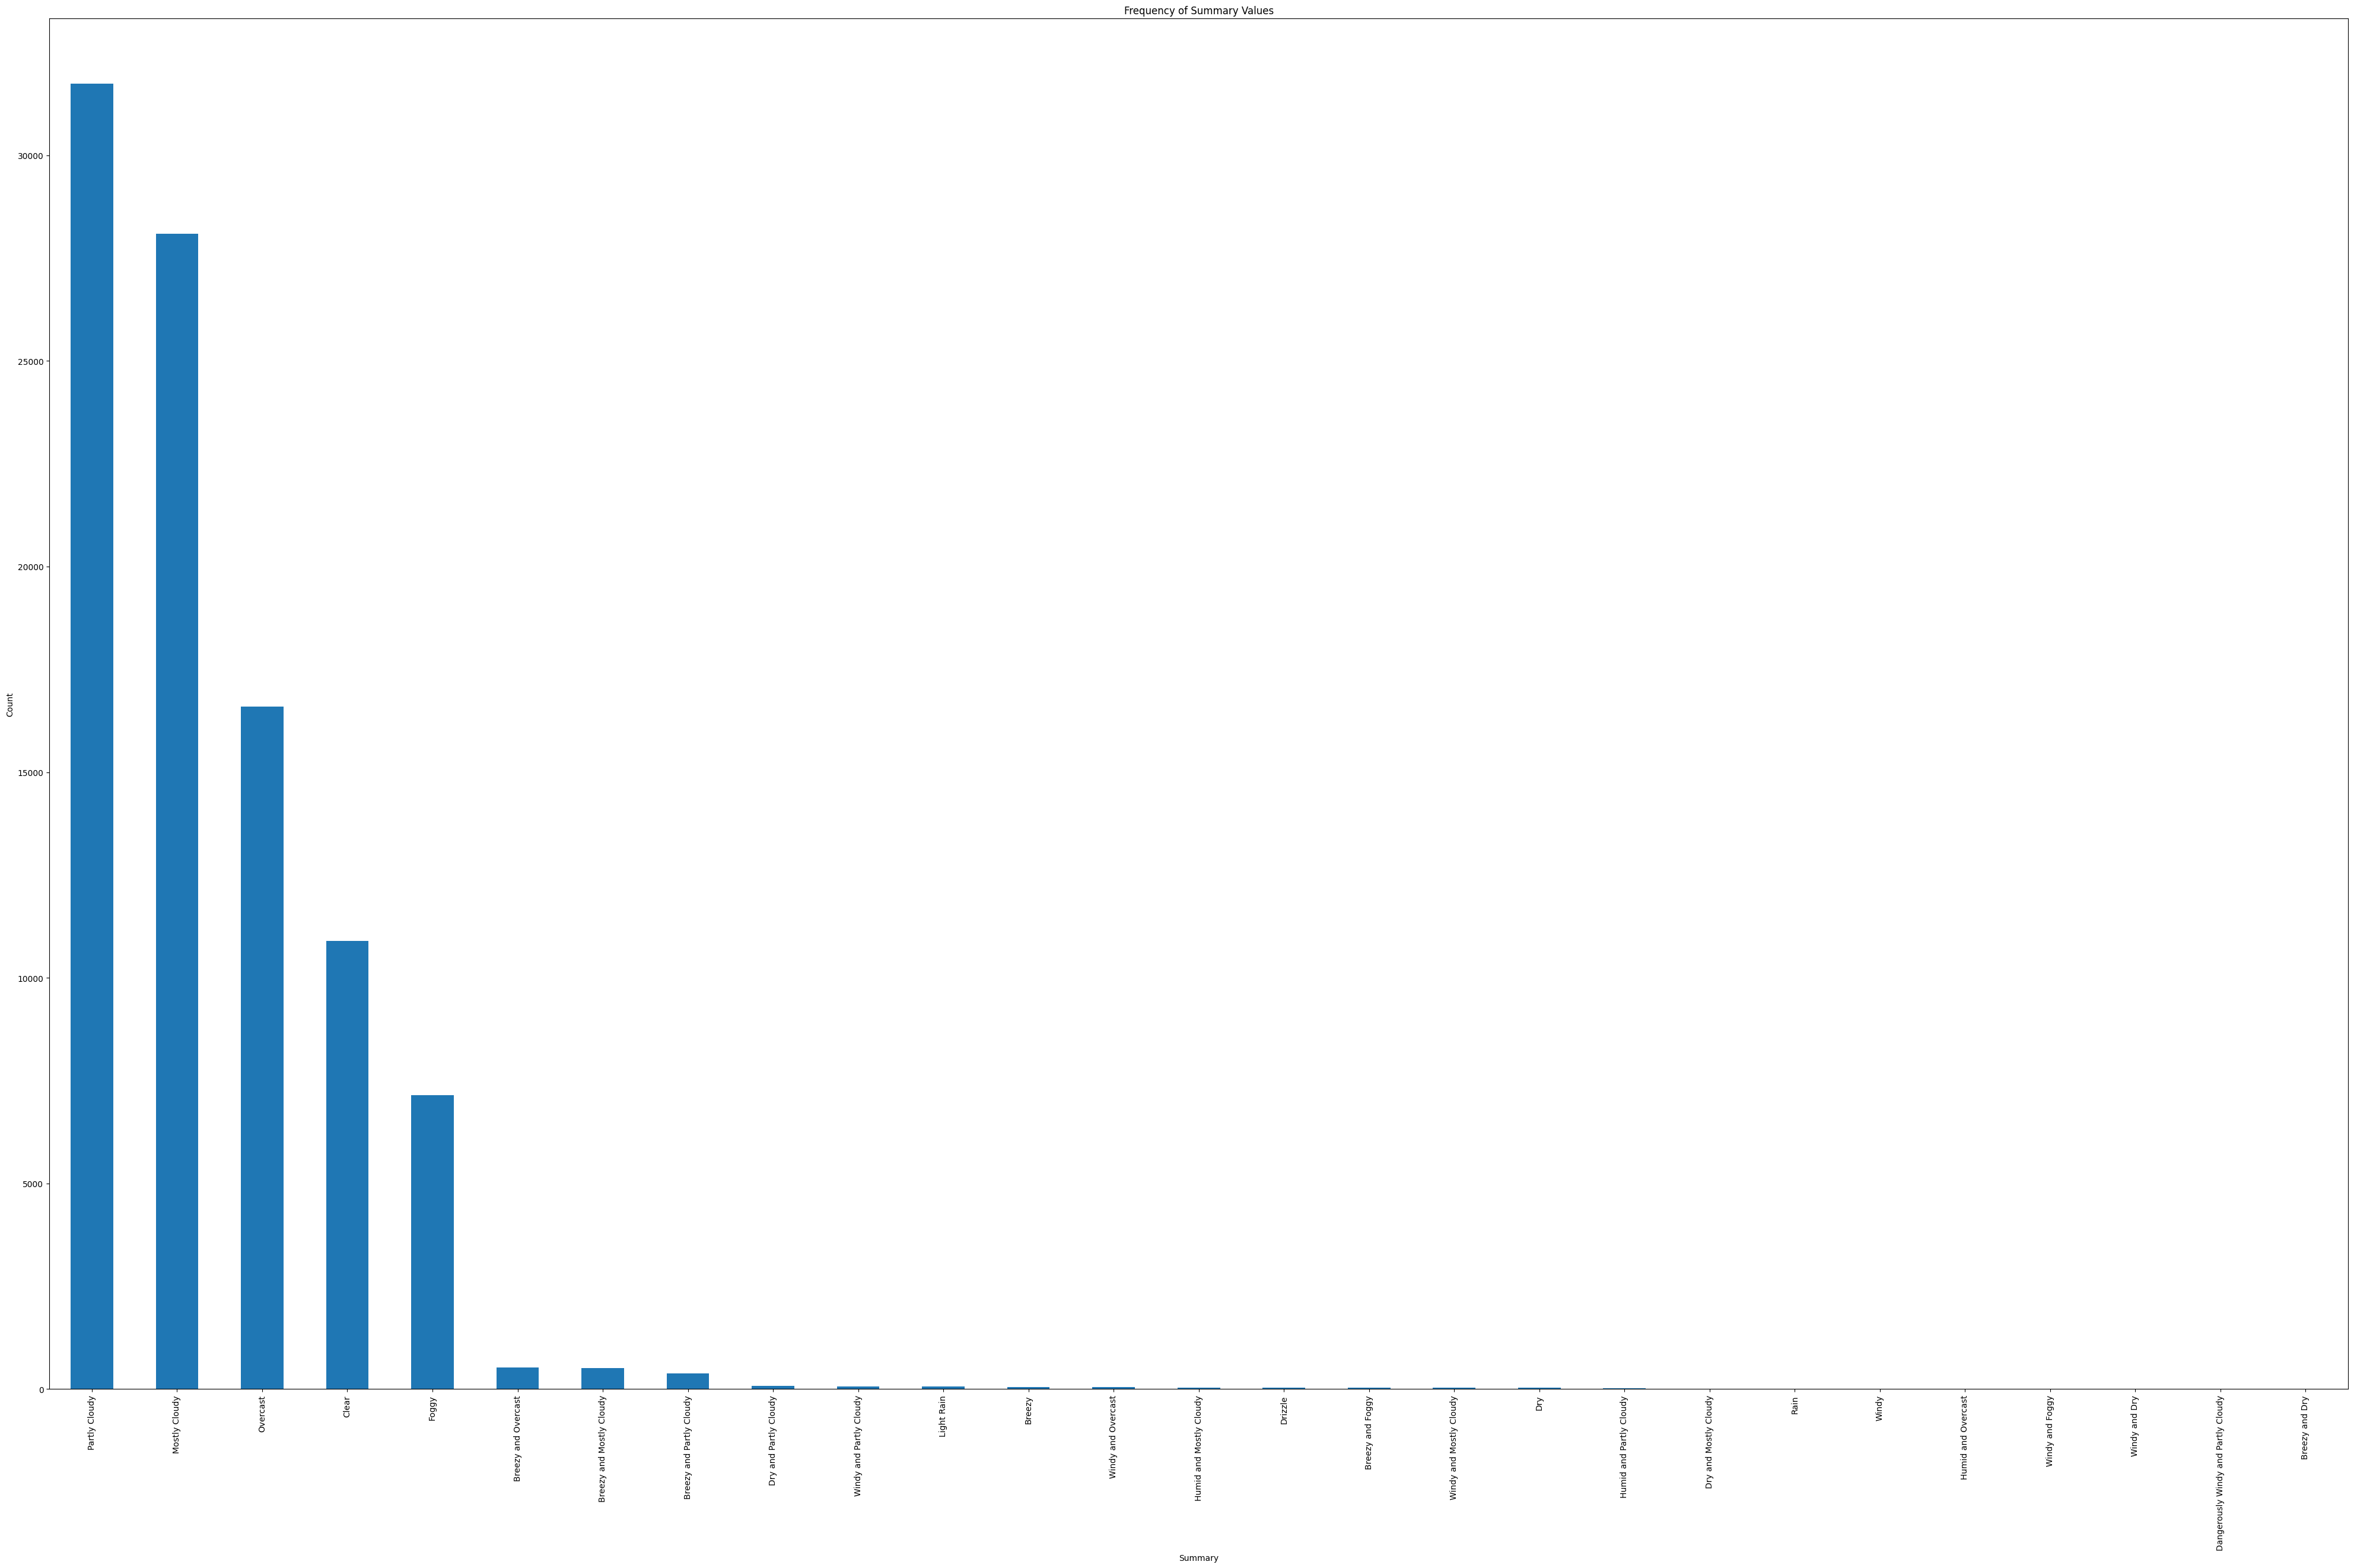

In [ ]:
plt.figure(figsize=(50, 30))
weather_df['Summary'].value_counts().plot(kind='bar')
plt.xlabel('Summary')
plt.ylabel('Count')
plt.title('Frequency of Summary Values')
plt.show()

# Precipitation Type Data
There's not a ton to see in this category, except for the fact that it rains incredibly often wherever this data is taken from, with over 80,000 occurences of rain in less than 100,000 samples.

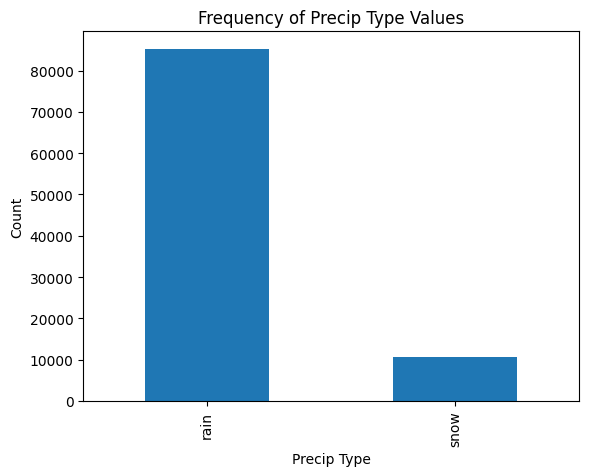

In [ ]:
weather_df['Precip Type'].value_counts().plot(kind='bar')
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.title('Frequency of Precip Type Values')
plt.show()

# Daily Summary Data
The daily summary data, like the summary data, is very difficult to parse, given so many different daily summaries. These are basically unique and therefore not really useful on such a large scale the way that the brief summaries are.

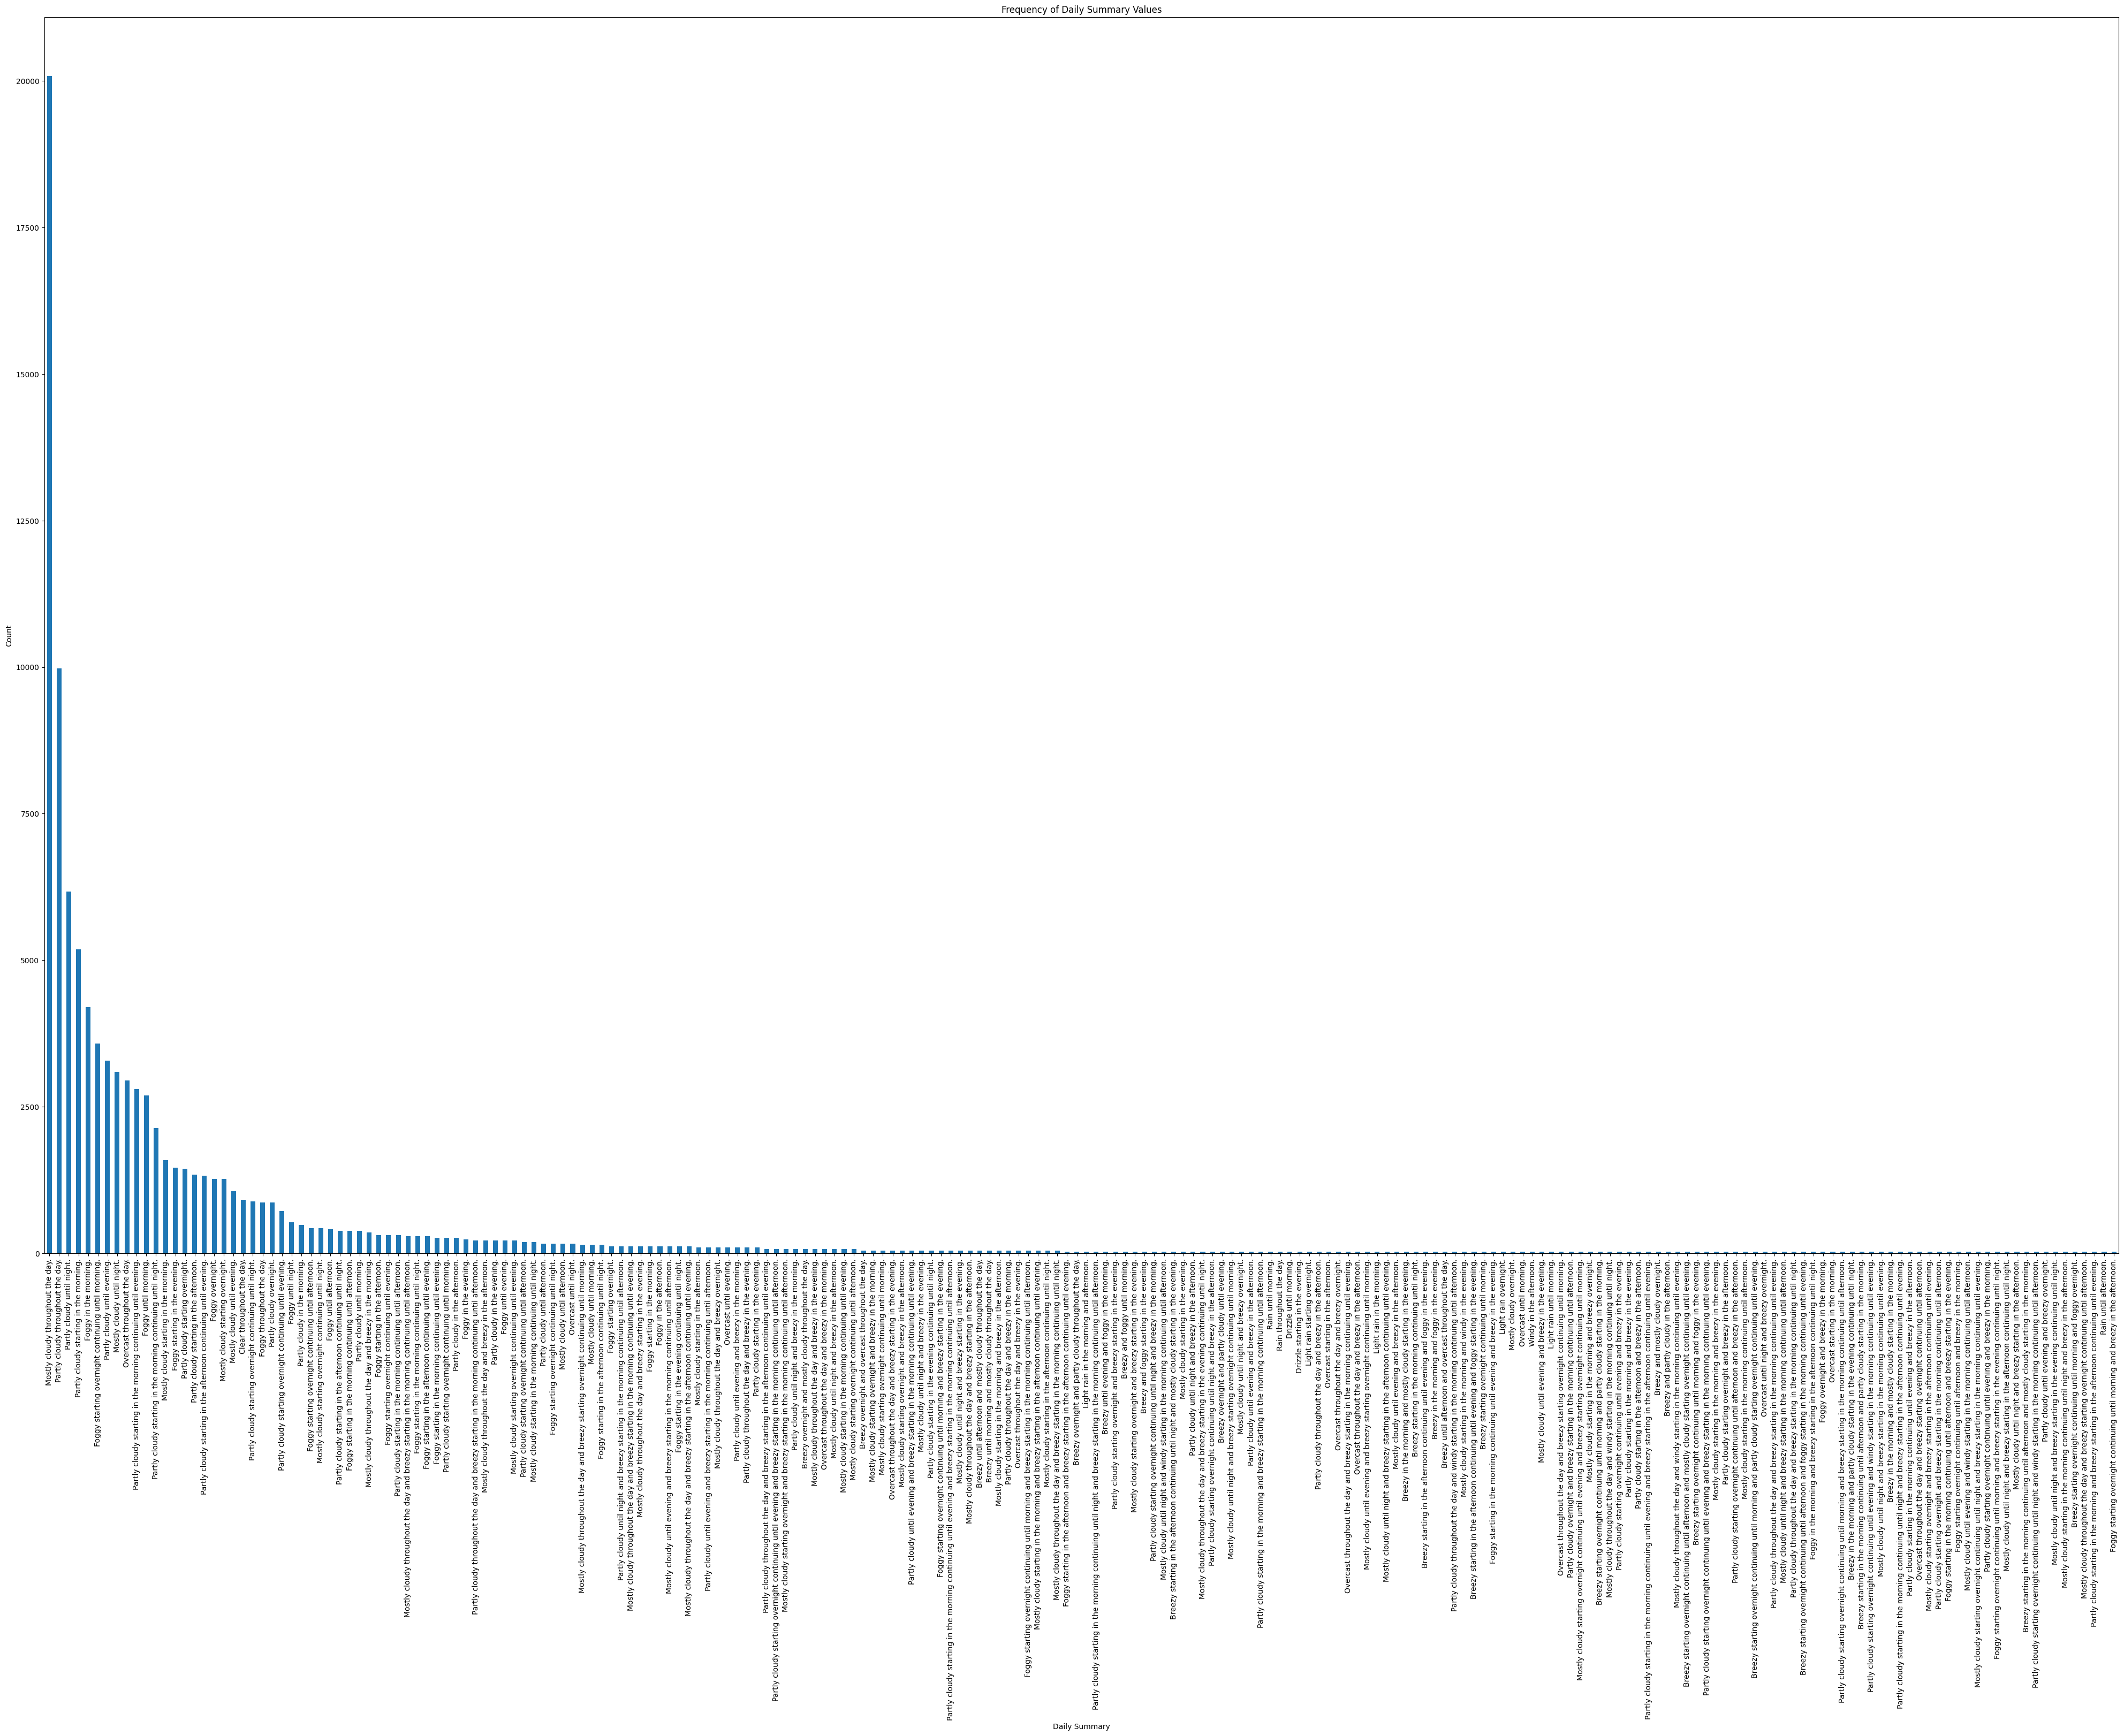

In [ ]:
plt.figure(figsize=(50, 30))
weather_df['Daily Summary'].value_counts().plot(kind='bar')
plt.xlabel('Daily Summary')
plt.ylabel('Count')
plt.title('Frequency of Daily Summary Values')
plt.show()

# Temperature Data
The temperature data looks like a normal distribution, which is definitely what I would expect, since I grew up here in Rhode Island where we've got four distinct seasons of about equal length. The apparent temperatures have broadly the same distribution if you squint at the graph, but strangly dead center of the distribution is a bit of a low-frequency valley.

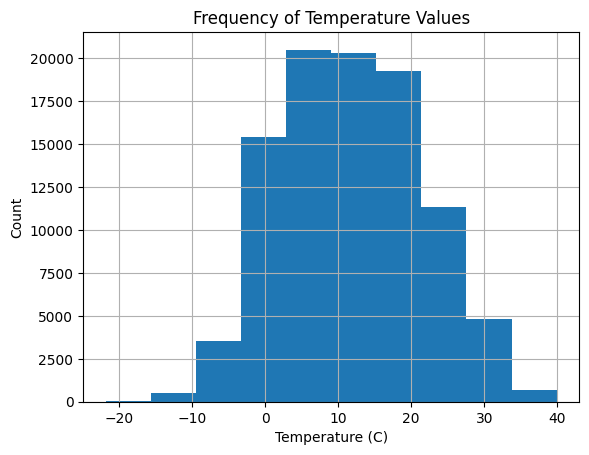

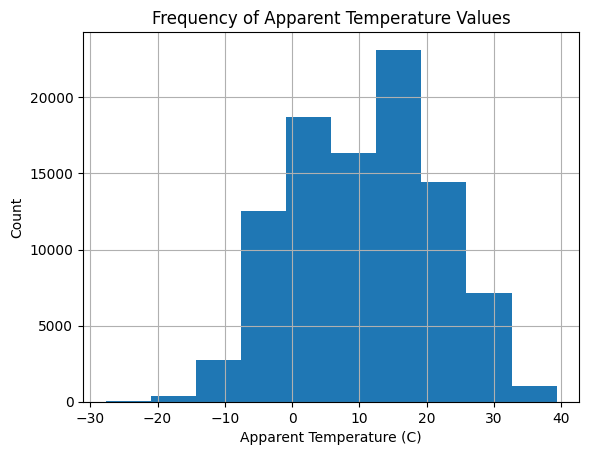

In [ ]:
weather_df['Temperature (C)'].hist()
plt.xlabel('Temperature (C)')
plt.ylabel('Count')
plt.title('Frequency of Temperature Values')
plt.show()

weather_df['Apparent Temperature (C)'].hist()
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Count')
plt.title('Frequency of Apparent Temperature Values')
plt.show()

# Humidity Data
The humidity data shows that higher humidities are much more likely wherever this data was collected. It looks like an almost linear increase along the length of the graph, with many instances between 0.8 and 1.

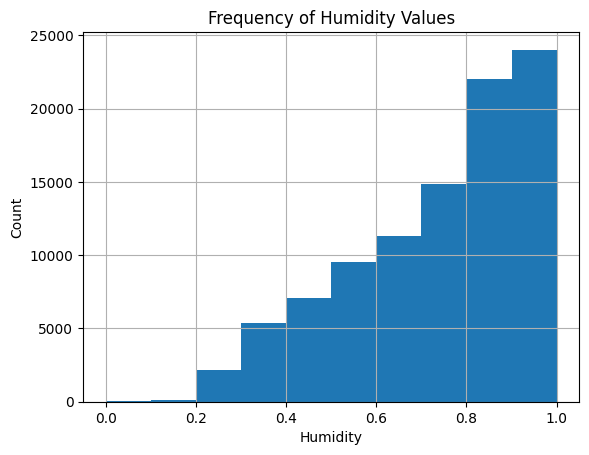

In [ ]:
weather_df['Humidity'].hist()
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Frequency of Humidity Values')
plt.show()

# Wind Data
Looking at the wind speed data, it's clear that the most common value is a very light breeze. There aren't many instances of wind over 20 km/h, so this location is probably not a very windy place. You could say that this data appears to be a left-skewed normal distribution.  
Assuming that a bearing of 0 degrees is straight north, and degrees increase going clockwise, it looks like there's not a lot of easterly winds, but there's plenty of north, south, and north-northwest winds. This data appears not to follow a recognizable distribution, likely results just from unique local geography/climate.

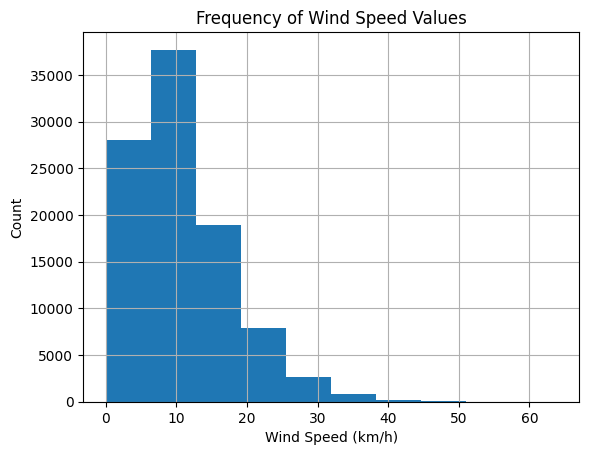

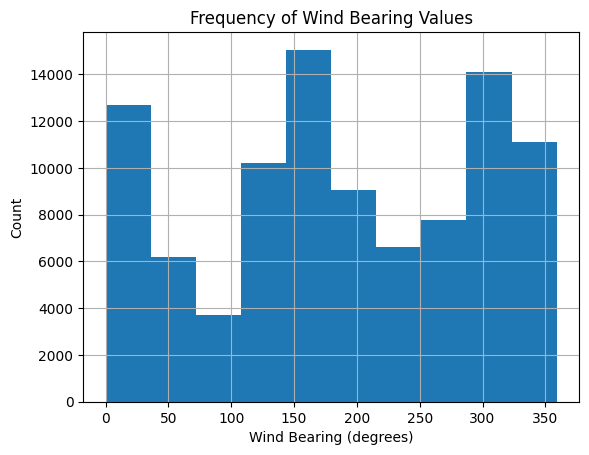

In [ ]:
weather_df['Wind Speed (km/h)'].hist()
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Count')
plt.title('Frequency of Wind Speed Values')
plt.show()

weather_df['Wind Bearing (degrees)'].hist()
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Count')
plt.title('Frequency of Wind Bearing Values')
plt.show()

# Visibility Data
This data pretty clearly shows that the 'standard' day of visibility is somewhere around 10-11 km, the next most frequent occurence being days of extreme high clarity, around 15-16 km. Other than those two, every degree of visibility between 0-16 occurs approximately as often as the rest. This data doesn't appear to have any recognizable distribution.

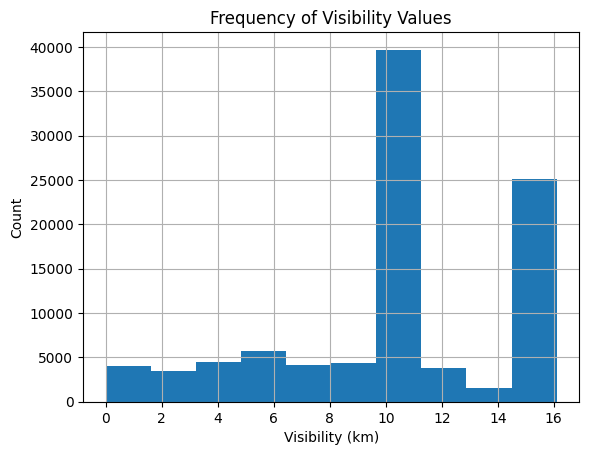

In [ ]:
weather_df['Visibility (km)'].hist()
plt.xlabel('Visibility (km)')
plt.ylabel('Count')
plt.title('Frequency of Visibility Values')
plt.show()

# Pressure Data
The pressure data is pretty uninteresting, at least to me without any real knowledge of what it might mean meteorologically. The data includes a few outliers that I can only think are the result of data collection or input problems, so when you replace those outliers with the average of the other (non-zero) pressures, the histogram becomes much more informative. This distribution now appears normal, which makes sense for a natural phenomenon.

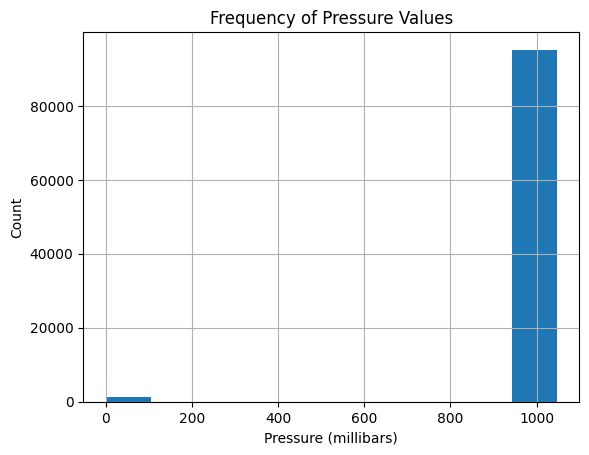

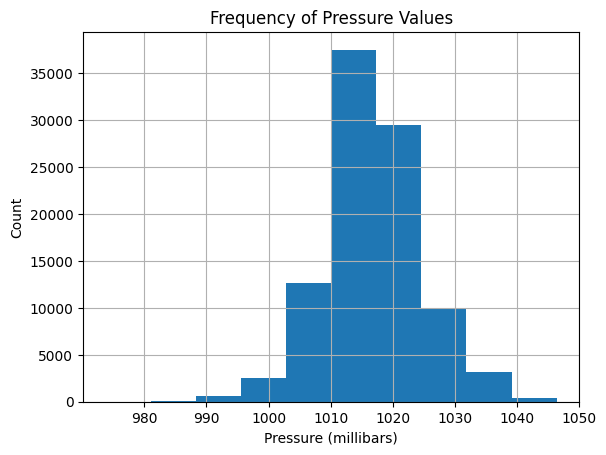

In [ ]:
weather_df['Pressure (millibars)'].hist()
plt.xlabel('Pressure (millibars)')
plt.ylabel('Count')
plt.title('Frequency of Pressure Values')
plt.show()

non_zero_pressure = weather_df['Pressure (millibars)'][weather_df['Pressure (millibars)'] != 0].mean()
weather_df['Pressure (millibars)'] = weather_df['Pressure (millibars)'].replace(0, non_zero_pressure)

weather_df['Pressure (millibars)'].hist()
plt.xlabel('Pressure (millibars)')
plt.ylabel('Count')
plt.title('Frequency of Pressure Values')
plt.show()